In [73]:
from numpy import *
from pylab import *
%matplotlib inline
from bitstream import BitStream
from audio.coders import rice
import audio.wave as wave
import audio.io

Preamble: Rice Coder
============

In [3]:
BitStream(42, uint16)

0000000000101010

In [6]:
frame = [0,0,1,1,7,255,301,16,78, 100, 0,0,0, 6]
r = rice.from_frame(frame, signed=False)
print r.b

5


In [8]:
BitStream(0,r)

000000

In [9]:
BitStream(1,r)

000010

In [10]:
BitStream(255, r)

1111111111110

In [7]:
BitStream(frame, r)

000000000000000010000010001110111111111111001101111111111010000001110110001001110000000000000000000001100

In [11]:
BitStream(1,rice(b=5,signed=True))

0000010

In [13]:
for b in range(0,9):
    print b, len(BitStream(frame, rice(signed=False, b=b)))

0 779
1 408
2 230
3 147
4 114
5 105
6 107
7 115
8 127


Rice Amplitude Coder (Audio)
================

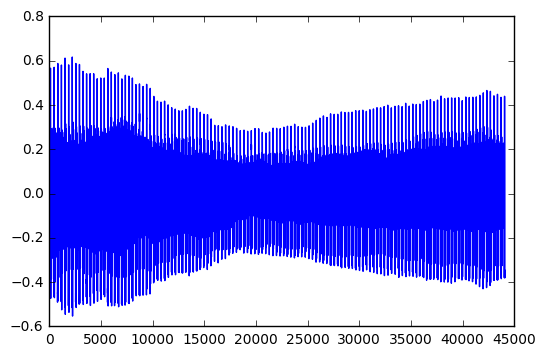

In [77]:
df = 44100.0; dt = 1.0 / df
f = 440.0
#t = r_[0:0.1:dt] # 0.1 sec of data
#data = sin(2*pi*f*t)
data = audio.io.record(1.0, df=df)[0]
plot(data)
data2 = wave.read(wave.write(data))

In [78]:
data3 = wave.read(wave.write(data), scale=False)
print data3.dtype
data = data3[0]
print len(data)

int16
44100


In [79]:
r = rice.from_frame(data, signed=True) # near 15 ?
print r.b

12


In [80]:
stream = BitStream(data, r)
print len(data) * 16
print len(stream) 


705600
647279


-32768


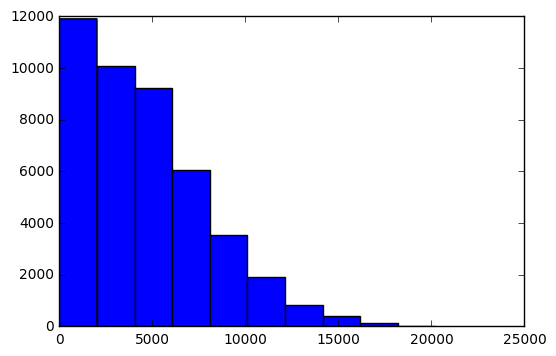

In [81]:
close()
hist(abs(data.astype(int32)))
# negative values of abs(data) ? WTF!!!
print abs(int16(-2**15)) # overflow: abs output is a int16!

59956


(array([  282.,   284.,   288.,   300.,   316.,   336.,   372.,   424.,
          544.,  1264.]),
 array([    0. ,   327.7,   655.4,   983.1,  1310.8,  1638.5,  1966.2,
         2293.9,  2621.6,  2949.3,  3277. ]),
 <a list of 10 Patch objects>)

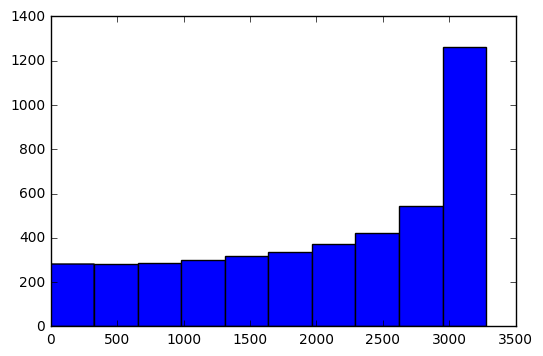

In [49]:
df = 44100.0; dt = 1.0 / df
f = 440.0
t = r_[0:0.1:dt] # 0.1 sec of data
data = 0.1*sin(2*pi*f*t)
data = wave.read(wave.write(data), scale=False)[0]
print len(BitStream(data, rice.from_frame(data, signed=True)))
hist(abs(data))

Differential Rice Coder
=============

In [58]:
df = 44100.0; dt = 1.0 / df
f = 440.0
t = r_[0:0.1:dt] # 0.1 sec of data
#data = sin(2*pi*f*t)
#data = wave.read(wave.write(data), scale=False)[0]

In [82]:
ddata = diff(data)
print len(data), len(ddata)

44100 44099


In [83]:
ddata = diff(r_[0,data]) # coding of the first value
print len(data), len(ddata)

44100 44100


(array([  3.08580000e+04,   9.10300000e+03,   2.15300000e+03,
          1.15400000e+03,   6.16000000e+02,   1.76000000e+02,
          3.60000000e+01,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([    0. ,   579.9,  1159.8,  1739.7,  2319.6,  2899.5,  3479.4,
         4059.3,  4639.2,  5219.1,  5799. ]),
 <a list of 10 Patch objects>)

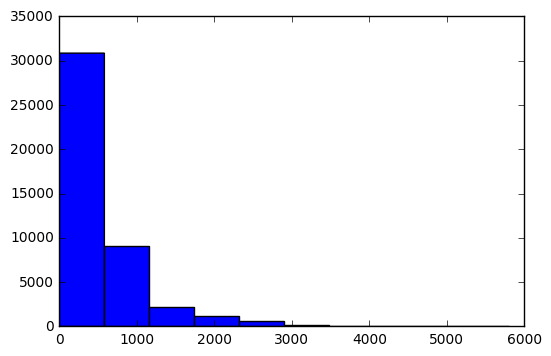

In [84]:
hist(abs(ddata))

In [85]:
r = rice.from_frame(ddata, signed=True)
print r.b
print len(BitStream(ddata, r))

8
508118


In [67]:
idata = cumsum(ddata)
all(data == idata)

True

In [86]:
dddata = diff(r_[0, diff(r_[0, data])])
r = rice.from_frame(dddata, signed=True)
print r.b
print len(BitStream(dddata, r))

7
430724


In [72]:
iidata = cumsum(cumsum(dddata))
all(data == iidata)

True